[*********************100%***********************]  1 of 1 completed


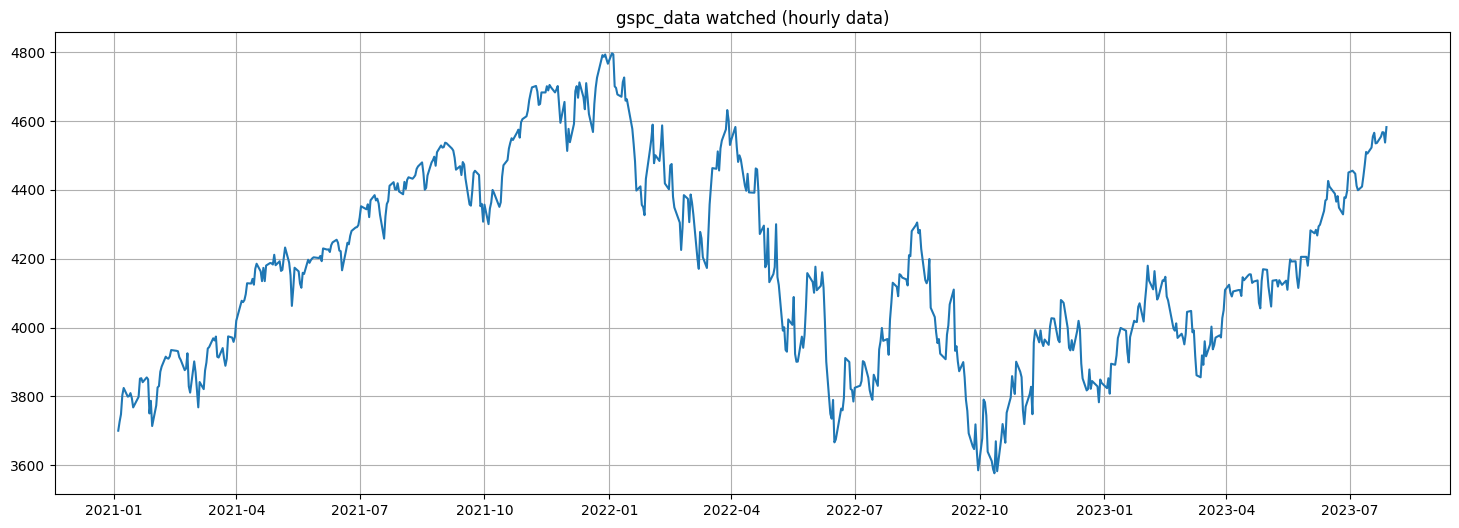

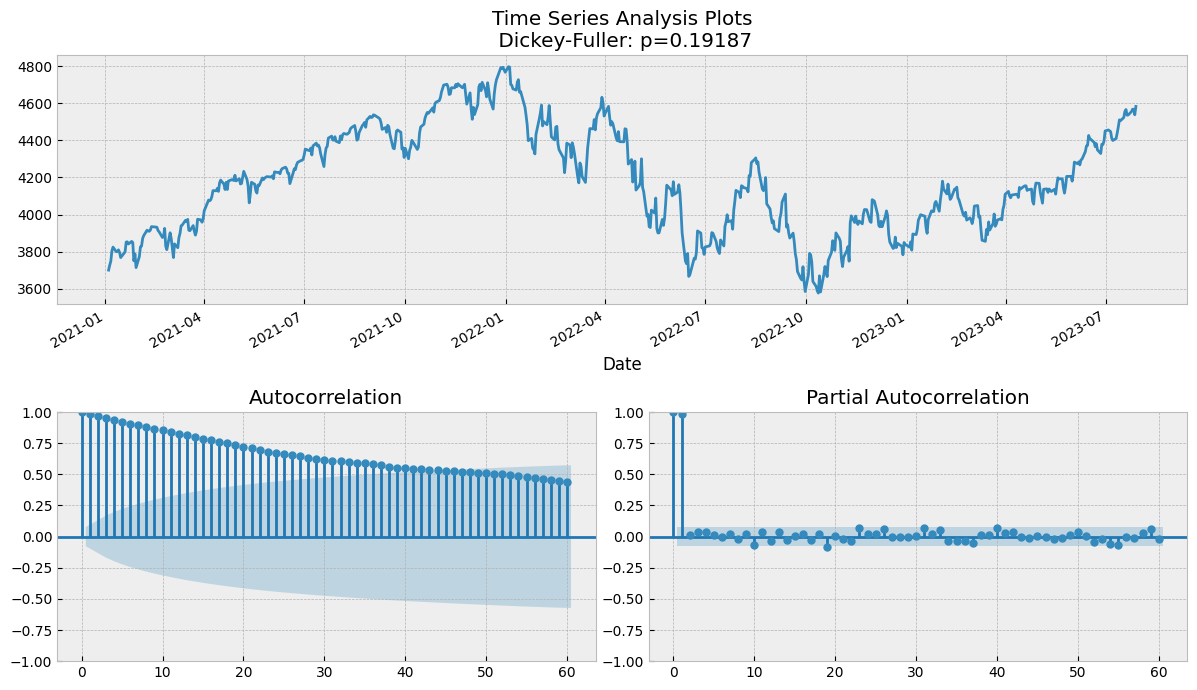

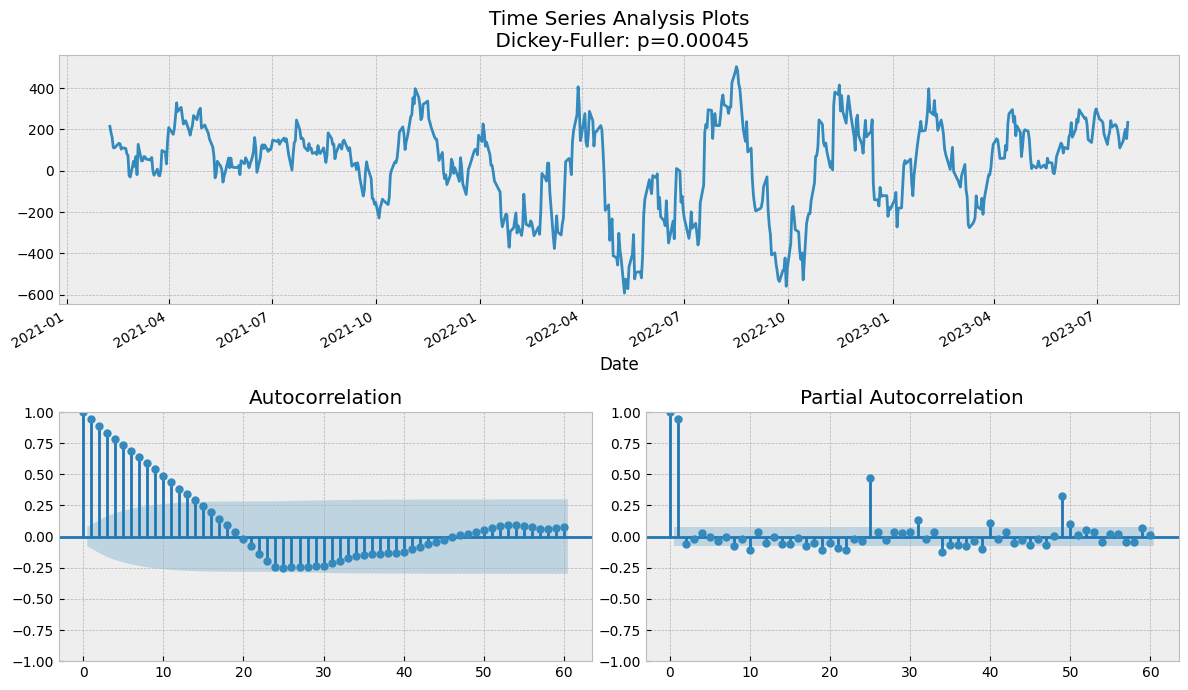

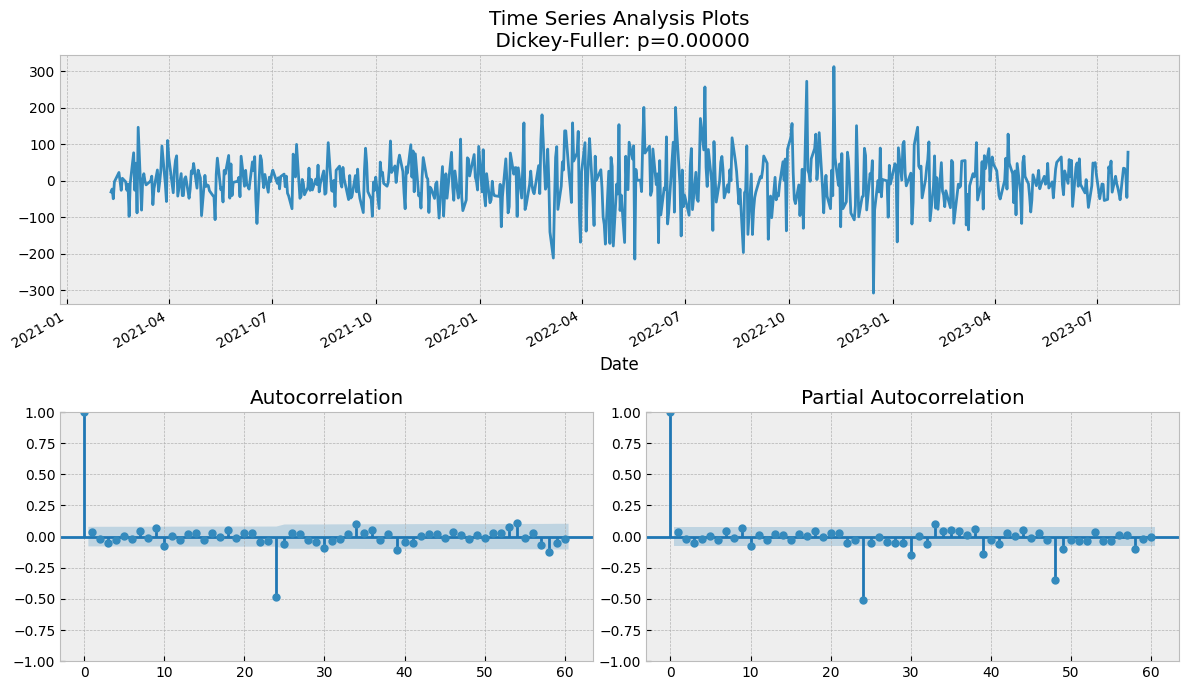

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product
from tqdm import tqdm_notebook

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import yfinance as yf


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series in Neural network

        y - timeseries
        lags - how many lags to include in Neural network
    """

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

start = "2021-01-01"
end = "2023-08-01"
data = yf.download(tickers="^GSPC", start=start, end=end)
gspc_data = data["Adj Close"]
#ads = pd.read_csv('/content/data.csv', index_col=['Date'], parse_dates=['Date'])
plt.figure(figsize=(18, 6))
plt.plot(gspc_data)
plt.title('gspc_data watched (hourly data)')
plt.grid(True)
plt.show()
tsplot(gspc_data, lags=60)
ads_diff = gspc_data - gspc_data.shift(24)
tsplot(ads_diff[24:], lags=60)
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)
